## Problem 📋
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

## Libraries 📚


In [1]:
import pandas as pd
import numpy as p
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.2)

## Data Loading 📂

In [2]:
df=pd.read_csv("BankChurners.csv")
df.head(2)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


## Ignore Useless Data 	✘

In [3]:
df=df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","CLIENTNUM"],axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data analysis

In [4]:
df.shape

(10127, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

In [8]:
num

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [14]:
for i in cat:
    print(f"{i}:\n {df[i].unique()}\n")

Attrition_Flag:
 ['Existing Customer' 'Attrited Customer']

Gender:
 ['M' 'F']

Education_Level:
 ['High School' 'Graduate' 'Uneducated' None 'College' 'Post-Graduate'
 'Doctorate']

Marital_Status:
 ['Married' 'Single' None 'Divorced']

Income_Category:
 ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 None]

Card_Category:
 ['Blue' 'Gold' 'Silver' 'Platinum']



## Missing values 🚫
The Unknown are in categorical column, therefore we will substitute the current values with None.

In [11]:
df=df.replace({'Unknown':None})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### impute missing values with the mode value.

In [13]:
df['Education_Level'].fillna(df['Education_Level'].mode().values[0])
df['Income_Category'].fillna(df['Income_Category'].mode().values[0])
df['Marital_Status'].fillna(df['Marital_Status'].mode().values[0])


0         Married
1          Single
2         Married
3         Married
4         Married
           ...   
10122      Single
10123    Divorced
10124     Married
10125     Married
10126     Married
Name: Marital_Status, Length: 10127, dtype: object

## Data Visualization 📊

In [39]:
#percentage
def precent_maker(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

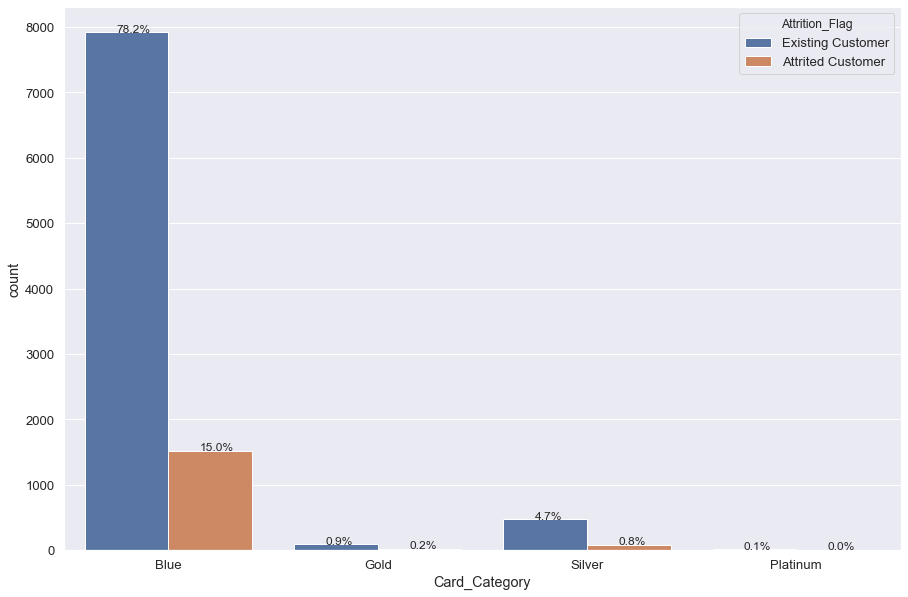

In [42]:
ax=sns.countplot(df['Card_Category'],hue=df["Attrition_Flag"])
precent_maker(ax,df['Card_Category'])
ax

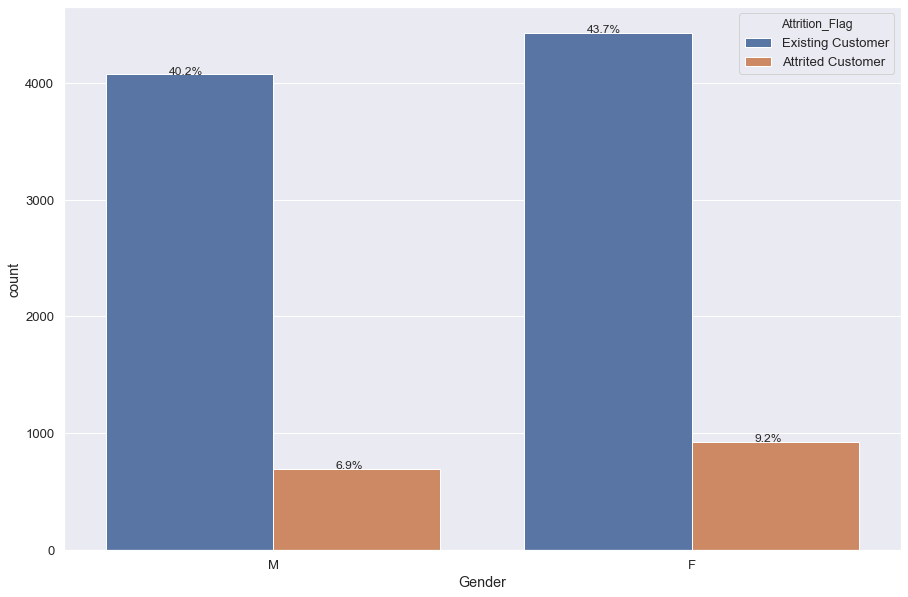

In [43]:
ax=sns.countplot(df['Gender'],hue=df["Attrition_Flag"])
precent_maker(ax,df['Gender'])
ax

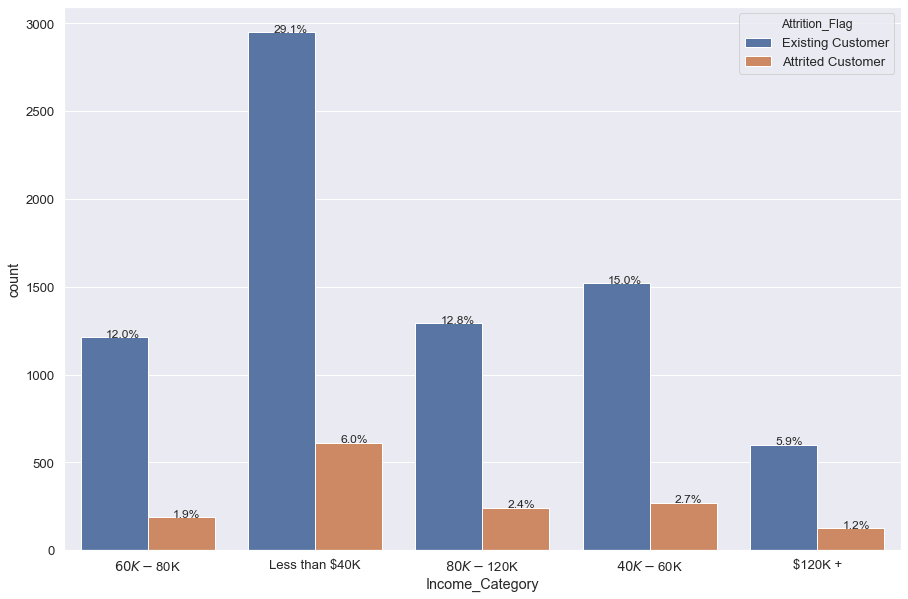

In [44]:
ax=sns.countplot(df['Income_Category'],hue=df["Attrition_Flag"])
precent_maker(ax,df['Income_Category'])
ax


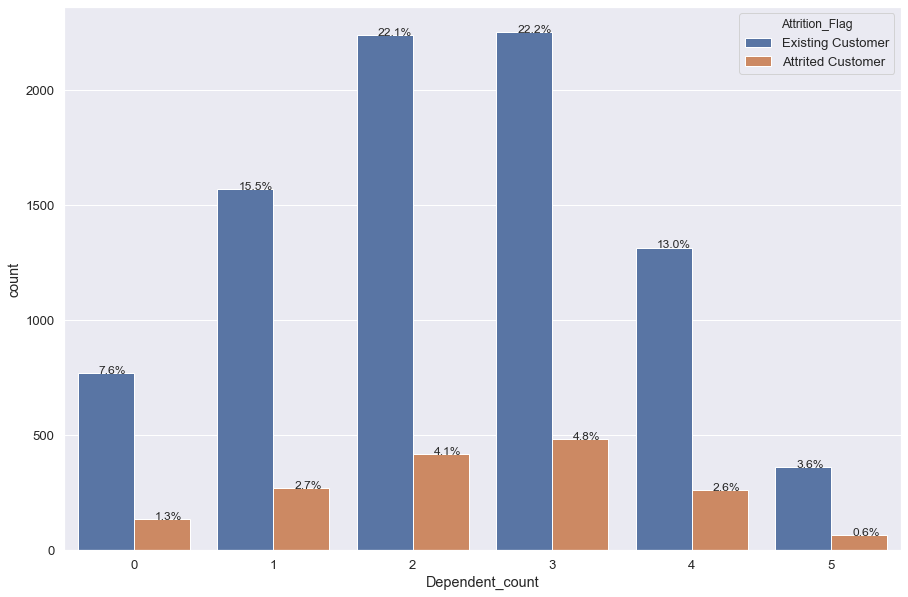

In [45]:
ax=sns.countplot(df['Dependent_count'],hue=df["Attrition_Flag"])
precent_maker(ax,df['Dependent_count'])
ax


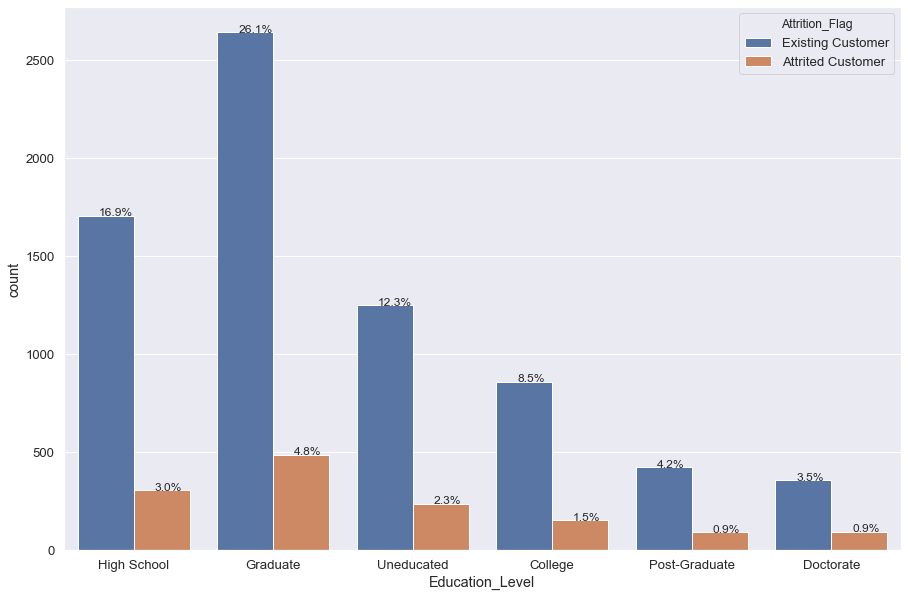

In [46]:
ax=sns.countplot(df['Education_Level'],hue=df["Attrition_Flag"])
precent_maker(ax,df['Education_Level'])
ax


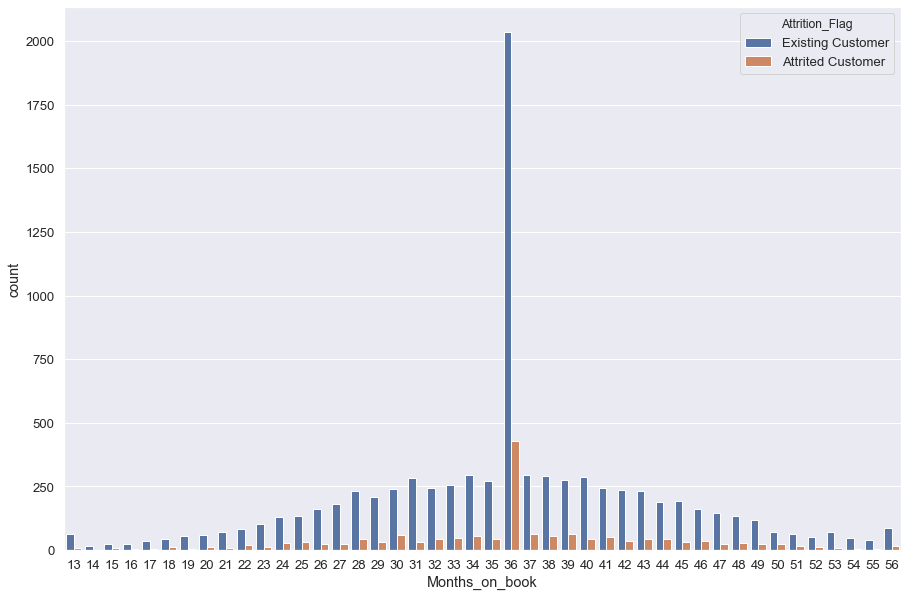

In [48]:
sns.countplot(df['Months_on_book'],hue=df["Attrition_Flag"])


Text(0, 0.5, 'count')

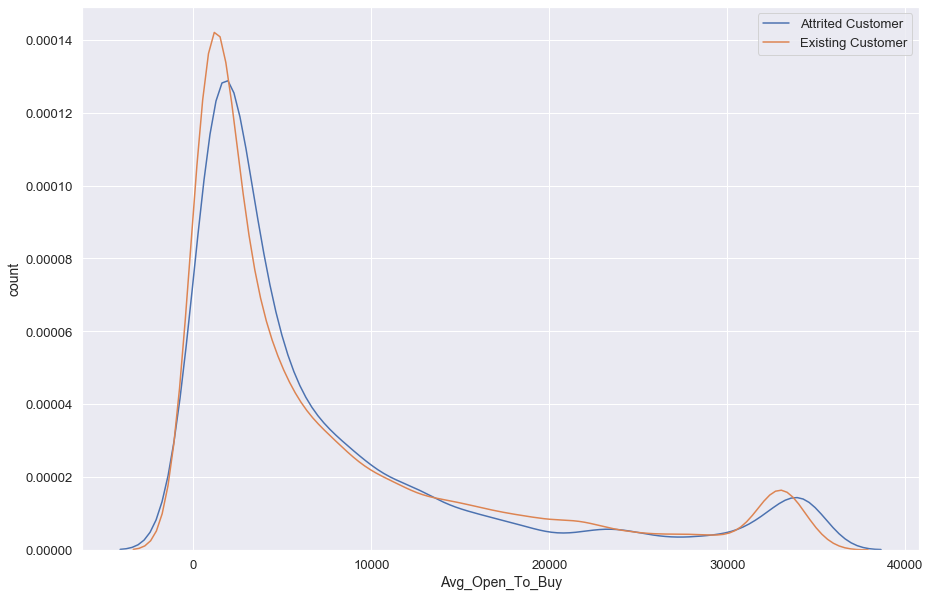

In [50]:
ax=sns.kdeplot(df[df["Attrition_Flag"]=="Attrited Customer"]["Avg_Open_To_Buy"],label="Attrited Customer")
sns.kdeplot(df[df["Attrition_Flag"]=="Existing Customer"]["Avg_Open_To_Buy"],label="Existing Customer")
plt.xlabel("Avg_Open_To_Buy", fontsize=14)
plt.ylabel('count', fontsize=14)



Text(0, 0.5, 'count')

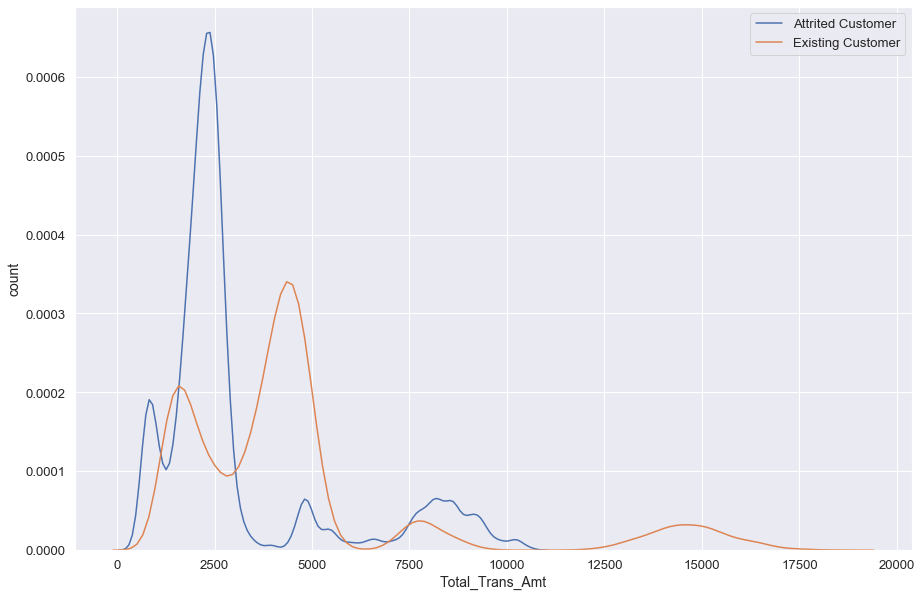

In [28]:
sns.kdeplot(df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Trans_Amt"],label="Attrited Customer")
sns.kdeplot(df[df["Attrition_Flag"]=="Existing Customer"]["Total_Trans_Amt"],label="Existing Customer")
plt.xlabel("Total_Trans_Amt", fontsize=14)
plt.ylabel('count', fontsize=14)

Text(0, 0.5, 'count')

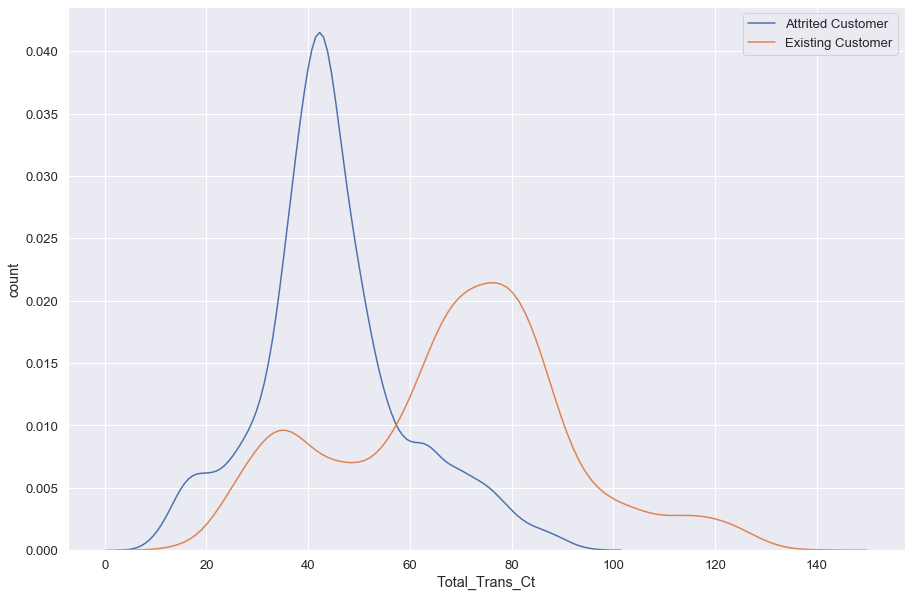

In [31]:
sns.kdeplot(df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Trans_Ct"],label="Attrited Customer")
sns.kdeplot(df[df["Attrition_Flag"]=="Existing Customer"]["Total_Trans_Ct"],label="Existing Customer")
plt.xlabel("Total_Trans_Ct")
plt.ylabel('count')

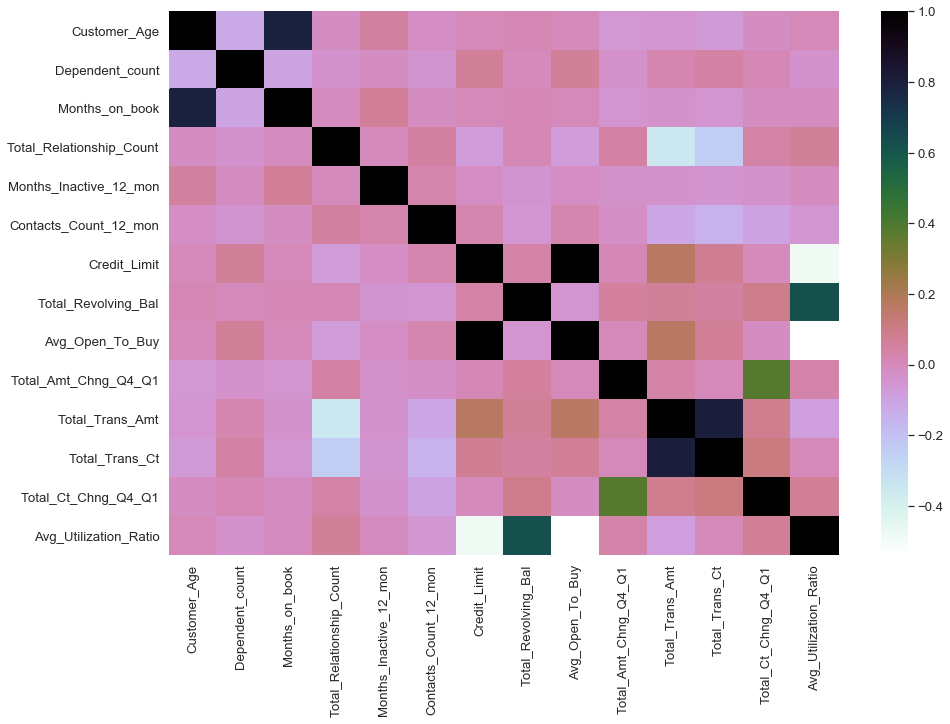

In [52]:
sns.heatmap(df.corr(),cmap='cubehelix_r')

## summary

Gender - Female clients have a slightly higher Atrrition rate.<br/><br/>
Education_Level - Post-Graduate clients have a slightly higher (Atrrition rate ,Doctorate clients have a higher Atrrition rate).<br/><br/>
Marital_Status - no major diffrence in attrition rates overall.<br/><br/>
Inocome_Category - clients with 120000 dollar or higher annual income have a slightly higher  Atrrition rate.<br/><br/>
Card_Category - Gold card clients have a slightly higher Atrrition rate,Platinum card clients have a higher Atrrition rate.




Total_Trans_Amt from[20:60] significant Atrrition rate.<br/><br/>
Total_Trans_Ct around 2500 significant Atrrition rate.<br/><br/>